# Observations/ Inferences
The data from this study presents the results of 249 mice with SCC tumors (Skin Cancer) treated with various drug regimens by Pymaceuticals, which specializes in anti-cancer medications. Over a 45-day period, Capomulin was tested against other regimens, revealing three main observations:

1. The summary statistics indicate that Capomulin and Ramicane are the most effective in reducing tumor volume, with mean volumes of 40.68 and 40.22, respectively, and low standard deviations (4.99 for Capomulin and 4.85 for Ramicane). In contrast, Ketapril had the highest mean tumor volume of 55.24 and the largest variability (standard deviation of 8.28), with Naftisol following closely behind. This suggests that Capomulin and Ramicane provide the most consistent and reliable tumor reduction.

2. When investigating tumor volume outliers for Capomulin, Ramicane, Infubinol, and Ceftamin, it was found that Infubinol had a clear outlier at 72.23, significantly larger than other values in that regimen. Capomulin, Ramicane, and Ceftamin showed potential outliers at 30.49, 32.98 (low), 43.05 (high), and 45.00 (low), respectively, reflecting some deviations in tumor responses across treatments.

3. A positive correlation between mouse weight and tumor volume was observed, with mouse ID-1509 showing a correlation coefficient of 0.84, indicating that larger mice tend to have larger tumors, which could provide additional insights into the dosage or effectiveness of treatments based on weight.s.lts.

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [66]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [48]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [67]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
Mice_duplicate_df =study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
Mice_duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [68]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [70]:
#Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())

248

# Summary Statistics

In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

Mice_dup = clean_study_data_complete

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean= Mice_dup.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median= Mice_dup.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var=Mice_dup.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev= Mice_dup.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
std_err=Mice_dup.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
stats_summ=pd.DataFrame({ "Mean Tumor Volume":mean, 
             "Median Tumor Volume":median, 
             "Tumor Volume Variance":var,
             "Tumor Volume Std. Dev":std_dev, 
             "Tumor Volume Std. Err.":std_err})

stats_summ

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [72]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats_summ_agg = Mice_dup.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean=('mean'),
    median=('median'),
    var=('var'),
    std=('std'),
    sem=('sem')
)

stats_summ_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


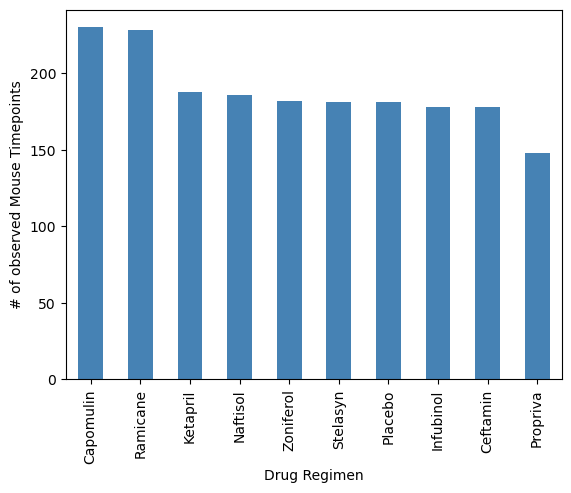

In [73]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts_df = Mice_dup['Drug Regimen'].value_counts()

counts_df.plot(kind='bar', color='steelblue')

plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')

plt.show()

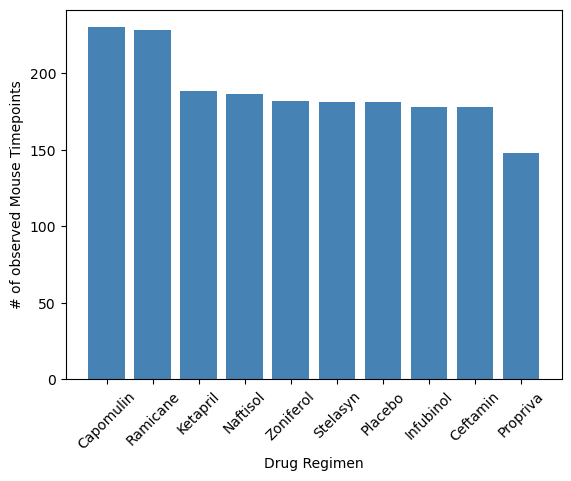

In [74]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts_df = Mice_dup['Drug Regimen'].value_counts()

plt.bar(counts_df.index, counts_df.values, color='steelblue')

plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')


# Rotate the x-axis labels for better readability if there are many categories
plt.xticks(rotation=45)

# Display the plot
plt.show()

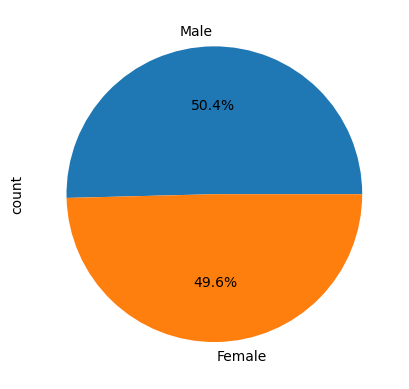

In [80]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
mice_df = clean_study_data_complete.loc[:, ["Mouse ID", "Sex"]].drop_duplicates()
# Make the pie chart
counts = mice_df.Sex.value_counts()

# Make the pie chart
counts.plot(kind='pie', autopct='%1.1f%%')

# Display the plot
plt.show()


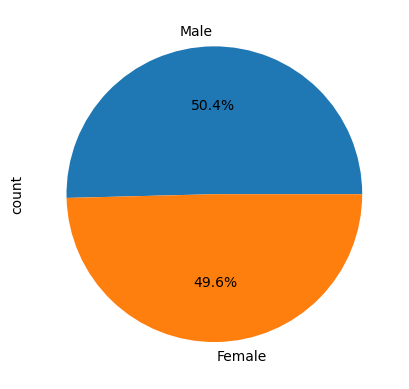

In [81]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
mice_df = clean_study_data_complete.loc[:, ["Mouse ID", "Sex"]].drop_duplicates()
# Make the pie chart
counts = mice_df.Sex.value_counts()
plt.pie(counts.values, labels=counts.index.values, autopct='%1.1f%%')
plt.ylabel("count")
plt.show()

# Quartiles, Outliers and Boxplots

In [82]:
Mice_dup.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [83]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Start by getting the last (greatest) timepoint for each mouse

final_timepoint = Mice_dup.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol_df = pd.merge(final_timepoint, Mice_dup, on=['Mouse ID', 'Timepoint'], how='left')

final_tumor_vol_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
final_tumor_vol_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [84]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_dict = {}

for drug in treatment_list:
    
    drug_data = final_tumor_vol_df[final_tumor_vol_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_vol_dict[drug] = drug_data.values
    
    # Calculate IQR and detect outliers
    Q1, Q3 = drug_data.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    print(f"{drug}'s potential outliers: {outliers}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [85]:
# Create and display the new DataFrame
final_tumor_vol_df_new = pd.DataFrame(tumor_vol_dict)
final_tumor_vol_df_new.head()

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078


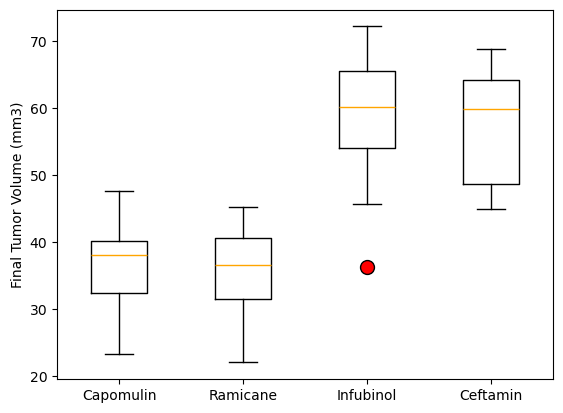

In [89]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
final_tumor_vol_df_new.boxplot(grid=False,
                               boxprops=dict(color='#000000'),
                               whiskerprops=dict(color='#000000'),
                               capprops=dict(color='#000000'),
                               medianprops=dict(color='orange'),
                               flierprops=dict(markerfacecolor='#FF0000', marker='o', markersize=10))

# Customize the plot
plt.title('')
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()


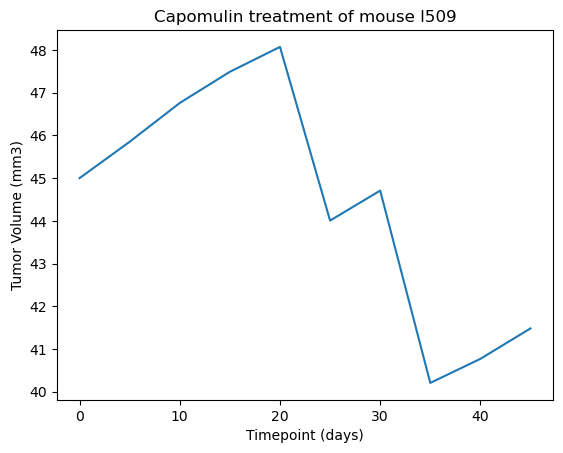

In [90]:
 #Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = clean_study_data_complete.loc[clean_study_data_complete['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

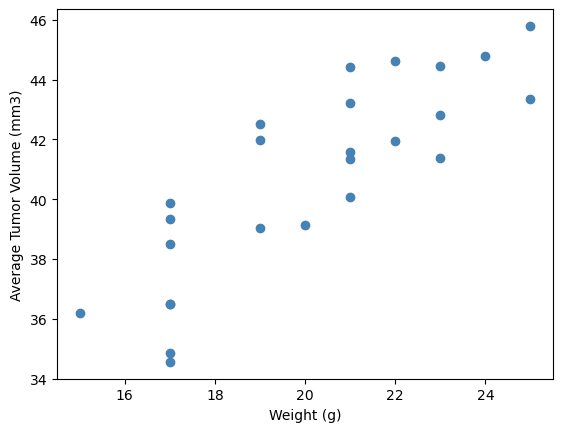

In [91]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = Mice_dup[Mice_dup['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the mouse weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Generate the scatter plot
plt.scatter(mouse_weight, avg_tumor_vol, color='steelblue')
plt.title('')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


The correlation between mouse weight and the average tumor volume is 0.84


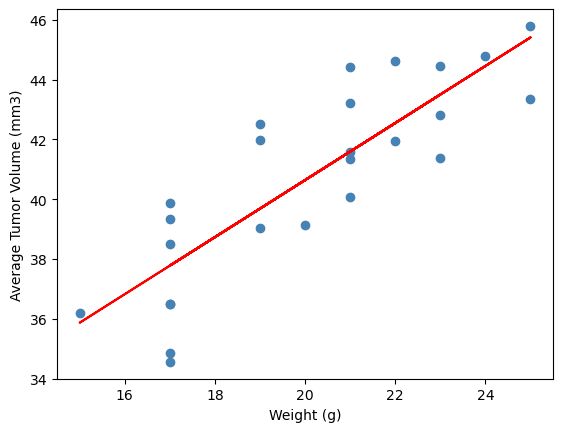

In [92]:
# Filter the data for Capomulin regimen
capomulin_data = Mice_dup[Mice_dup['Drug Regimen'] == 'Capomulin']

avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# correlation coefficient
pearson_corr, p_value = st.pearsonr(mouse_weight, avg_tumor_vol)
print(f"The correlation between mouse weight and the average tumor volume is {pearson_corr:.2f}")

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_vol)

# The regression line
regress_values = slope * mouse_weight + intercept

# Plot the data
plt.scatter(mouse_weight, avg_tumor_vol, color='steelblue')
plt.plot(mouse_weight, regress_values, color='red', label=f'y={slope:.2f}x+{intercept:.2f}')
plt.title('')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

